In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
filenames = [
    'cnn_4cls_128dim_0.5tm_model.csv',
    'cnn_4cls_128dim_1.5tm_model.csv',
    'cnn_4cls_128dim_1tm_model.csv',
    'resnet18_4cls_64dim_1.5tm_model.csv',
    'resnet18_4cls_64dim_1tm_model.csv',
    'resnet18_4cls_128dim_1tm_model.csv'
]

In [3]:
data = []
for filename in filenames:
    temp = pd.read_csv(f'./output_w_transform/{filename}')
    data.append(temp)
data = pd.concat(data, axis=0, ignore_index=True)

In [4]:
data['transform'] = '_transformed'

In [5]:
filenames = [
    'cnn_4cls_128dim_0.5tm_model.csv',
    'cnn_4cls_128dim_1.5tm_model.csv',
    'cnn_4cls_128dim_1tm_model.csv'
]

In [6]:
raw = []
for filename in filenames:
    temp = pd.read_csv(f'./output_wo_transform/{filename}')
    raw.append(temp)
raw = pd.concat(raw, axis=0, ignore_index=True)

In [7]:
raw['transform'] = '_no_transform'

In [8]:
data = pd.concat([data, raw], axis=0, ignore_index=True)

In [9]:
data['model'] = data['model'] + data['transform']

# Stats

In [10]:
data.head()

,train_accuracy,test_accuracy,train_loss,test_loss,model,epochs,transform
0,56.390,68.975,0.789143,0.695844,cnn_4cls_128dim_0.5_transformed,1,_transformed
1,69.085,70.725,0.560590,0.607014,cnn_4cls_128dim_0.5_transformed,2,_transformed
2,72.810,73.875,0.492129,0.560024,cnn_4cls_128dim_0.5_transformed,3,_transformed
3,75.145,79.700,0.454797,0.465376,cnn_4cls_128dim_0.5_transformed,4,_transformed
4,76.915,80.675,0.439859,0.451191,cnn_4cls_128dim_0.5_transformed,5,_transformed


In [11]:
fig_data = data[data['model'].str.startswith('cnn_4cls_128dim_1_')].reset_index(drop=True)

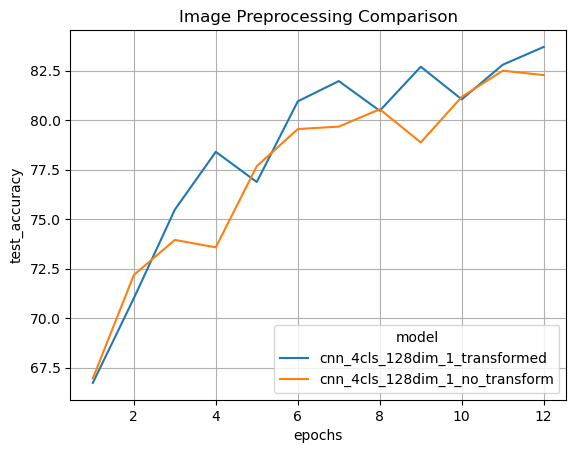

In [12]:
sns.lineplot(data=fig_data, x='epochs', y='test_accuracy', hue='model')
plt.title('Image Preprocessing Comparison')
plt.grid(True)
plt.show()

In [13]:
fig_data['model'].unique()

array(['cnn_4cls_128dim_1_transformed', 'cnn_4cls_128dim_1_no_transform'],
      dtype=object)

In [14]:
fig_data = data[data['model'].isin(['resnet18_4cls_64dim_1_transformed', 'cnn_4cls_128dim_1_transformed'])].reset_index(drop=True)

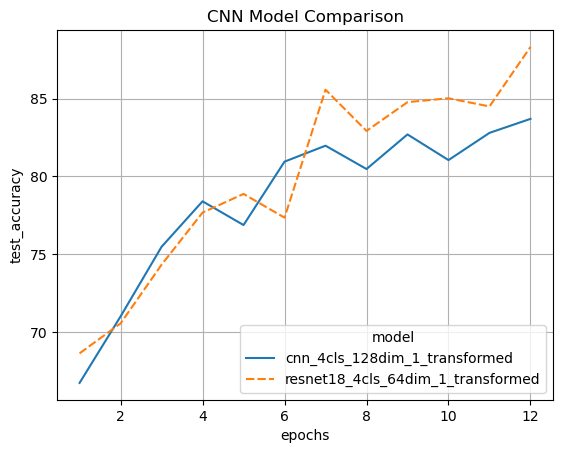

In [15]:
sns.lineplot(data=fig_data, x='epochs', y='test_accuracy', hue='model', style='model')
plt.title('CNN Model Comparison')
plt.grid(True)
plt.show()